In [2]:
# Importing necessary libraries
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical operations
import seaborn as sns # For data visualization
import matplotlib.pyplot as plt 

df = pd.read_csv(r'C:\Users\userp\Downloads\archive (4)\iris.csv')

print("First 5 rows of the dataset:")
print(df.head())
      
print("\nColumn names in the dataset:")
print(df.columns)

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nDescriptive statistics for the dataset:")
print(df.describe())

print("\nDataset dimensions (rows, columns):", df.shape)

print("\nData types of each column:")
print(df.dtypes)

df['species'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

df['sepal_length'].fillna(df['sepal_length'].mean(), inplace=True)
df['sepal_width'].fillna(df['sepal_width'].mean(), inplace=True)
df['petal_length'].fillna(df['petal_length'].mean(), inplace=True)
df['petal_width'].fillna(df['petal_width'].mean(), inplace=True)

print("\nAfter converting 'species' to numeric:")
print(df[['species']].head())


First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Column names in the dataset:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Descriptive statistics for the dataset:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.00000

# Assignment 2

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\userp\Downloads\archive (10)\StudentsPerformance.csv")

# Step 1: Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Show initial data
print("Initial Dataset Info:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())

df.loc[2, 'math_score'] = np.nan
df['math_score'].fillna(df['math_score'].mean(), inplace=True)

# Step 2: Detect and handle outliers using Z-score for numeric columns
numeric_cols = ['math_score', 'reading_score', 'writing_score']
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Step 3: Data transformation (log transformation on reading_score)
df_no_outliers['log_reading_score'] = np.log1p(df_no_outliers['reading_score'])

# Show skewness before and after
print("\nSkewness Before:", df_no_outliers['reading_score'].skew())
print("Skewness After:", df_no_outliers['log_reading_score'].skew())

# Final cleaned and transformed data
print("\nFinal Cleaned Dataset Sample:\n", df_no_outliers.head())


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Missing Values:
 gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  

C:\Users\userp\AppData\Local\Temp\ipykernel_2416\2469927503.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['log_reading_score'] = np.log1p(df_no_outliers['reading_score'])


# Assignment 3

In [26]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\userp\Downloads\archive (10)\StudentsPerformance.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Summary statistics grouped by a categorical variable (e.g., gender)
grouped_stats = df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].agg(['mean', 'median', 'min', 'max', 'std'])

print("Grouped Summary Statistics by Gender:\n", grouped_stats)

# Create a list that maps numeric values to categorical responses
# Example: gender -> numeric mapping
gender_map = {'female': 0, 'male': 1}
gender_numeric = df['gender'].map(gender_map).tolist()
print("\nMapped Gender to Numeric Values:\n", gender_numeric[:10])  # Display first 10


Grouped Summary Statistics by Gender:
        math_score                            reading_score                  \
             mean median min  max        std          mean median min  max   
gender                                                                       
female  63.633205   65.0   0  100  15.491453     72.608108   73.0  17  100   
male    68.728216   69.0  27  100  14.356277     65.473029   66.0  23  100   

                  writing_score                             
              std          mean median min  max        std  
gender                                                      
female  14.378245     72.467181   74.0  10  100  14.844842  
male    13.931832     63.311203   64.0  15  100  14.113832  

Mapped Gender to Numeric Values:
 [0, 0, 0, 1, 1, 0, 0, 1, 1, 0]


In [27]:
import seaborn as sns

# Load iris dataset
iris = sns.load_dataset('iris')

# Display basic statistics for each species
species_stats = iris.groupby('species').describe(percentiles=[.25, .5, .75])
print("\nBasic Statistical Details of Each Iris Species:\n", species_stats)



Basic Statistical Details of Each Iris Species:
            sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  mi

# Assignment 4

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
boston = pd.read_csv(r'C:\Users\userp\Downloads\archive (6)\HousingData.csv')

# Drop rows with missing values
boston = boston.dropna()

# Features and target
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 31.454047664950888
R2 Score: 0.6270849941673189


# Assignment 5

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load the dataset
data = pd.read_csv(r'C:\Users\userp\Downloads\archive (3)\Social_Network_Ads.csv') # Adjust path

# Check dataset columns
print("Dataset Columns:", data.columns)

# Select features (Age, EstimatedSalary) and target (Purchased)
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split dataset into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling (Standardization)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the Logistic Regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Extracting TP, FP, FN, TN from the confusion matrix
TN, FP, FN, TP = cm.ravel()
print(f"\nTrue Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display the metrics
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Dataset Columns: Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

Confusion Matrix:
 [[65  3]
 [ 8 24]]

True Negative (TN): 65
False Positive (FP): 3
False Negative (FN): 8
True Positive (TP): 24

Accuracy: 0.89
Error Rate: 0.11
Precision: 0.89
Recall: 0.75


# Assignment 6

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load the iris dataset (You can use sklearn or pandas to load it)
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target variable (species)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naïve Bayes classifier
nb_classifier = GaussianNB()

# Train the model on the training data
nb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# For each class, calculate TP, FP, FN, and TN
for i in range(cm.shape[0]):  # For each class
    TP = cm[i, i]  # True Positive
    FN = cm[i, :].sum() - TP  # False Negative
    FP = cm[:, i].sum() - TP  # False Positive
    TN = cm.sum() - (TP + FP + FN)  # True Negative
    
    print(f"\nFor class {i}:")
    print(f"True Positive (TP): {TP}")
    print(f"False Positive (FP): {FP}")
    print(f"False Negative (FN): {FN}")
    print(f"True Negative (TN): {TN}")

# Calculate the evaluation metrics for multi-class classification
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)

# Display the metrics
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")



Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

For class 0:
True Positive (TP): 10
False Positive (FP): 0
False Negative (FN): 0
True Negative (TN): 20

For class 1:
True Positive (TP): 9
False Positive (FP): 0
False Negative (FN): 0
True Negative (TN): 21

For class 2:
True Positive (TP): 11
False Positive (FP): 0
False Negative (FN): 0
True Negative (TN): 19

Accuracy: 1.00
Error Rate: 0.00
Precision: 1.00
Recall: 1.00


# Assignment 7

In [38]:
# Import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# Download necessary NLTK data files (if not already installed)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample document
document = "Running is a good exercise, and it's better than sitting. The quick brown fox jumped over the lazy dog."

# 1. Tokenization
tokens = word_tokenize(document)
print("Tokens:", tokens)

# 2. POS Tagging
pos_tags = pos_tag(tokens)
print("\nPOS Tags:", pos_tags)

# 3. Stop words removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]
print("\nFiltered Tokens (Stop Words Removed):", filtered_tokens)

# 4. Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
print("\nStemmed Tokens:", stemmed_tokens)

# 5. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print("\nLemmatized Tokens:", lemmatized_tokens)

# 6. TF and IDF Calculation
# For this step, let's assume we have a corpus of documents. Here, we'll use just one document for simplicity.
corpus = [document]

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the document
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Convert the matrix to a DataFrame for easier interpretation
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=tfidf_vectorizer.get_feature_names_out(), columns=["TF-IDF"])
print("\nTF-IDF Matrix:\n", tfidf_df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\userp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\userp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\userp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\userp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Tokens: ['Running', 'is', 'a', 'good', 'exercise', ',', 'and', 'it', "'s", 'better', 'than', 'sitting', '.', 'The', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog', '.']

POS Tags: [('Running', 'VBG'), ('is', 'VBZ'), ('a', 'DT'), ('good', 'JJ'), ('exercise', 'NN'), (',', ','), ('and', 'CC'), ('it', 'PRP'), ("'s", 'VBZ'), ('better', 'JJR'), ('than', 'IN'), ('sitting', 'VBG'), ('.', '.'), ('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumped', 'VBD'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]

Filtered Tokens (Stop Words Removed): ['Running', 'good', 'exercise', "'s", 'better', 'sitting', 'quick', 'brown', 'fox', 'jumped', 'lazy', 'dog']

Stemmed Tokens: ['run', 'good', 'exercis', "'s", 'better', 'sit', 'quick', 'brown', 'fox', 'jump', 'lazi', 'dog']

Lemmatized Tokens: ['Running', 'good', 'exercise', "'s", 'better', 'sitting', 'quick', 'brown', 'fox', 'jumped', 'lazy', 'dog']

TF-IDF Matrix:
             TF-IDF
and      

# Assignment 8

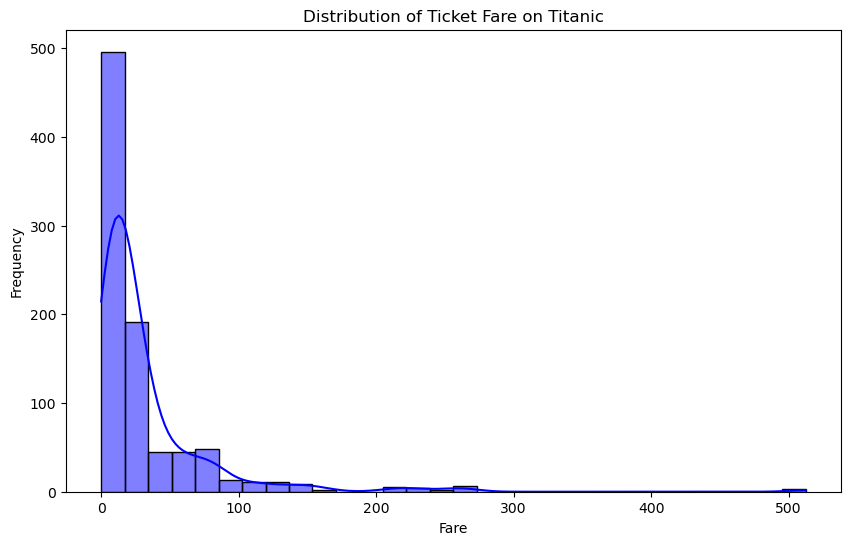

C:\Users\userp\AppData\Local\Temp\ipykernel_13952\2905812573.py:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm', fmt='.2f')


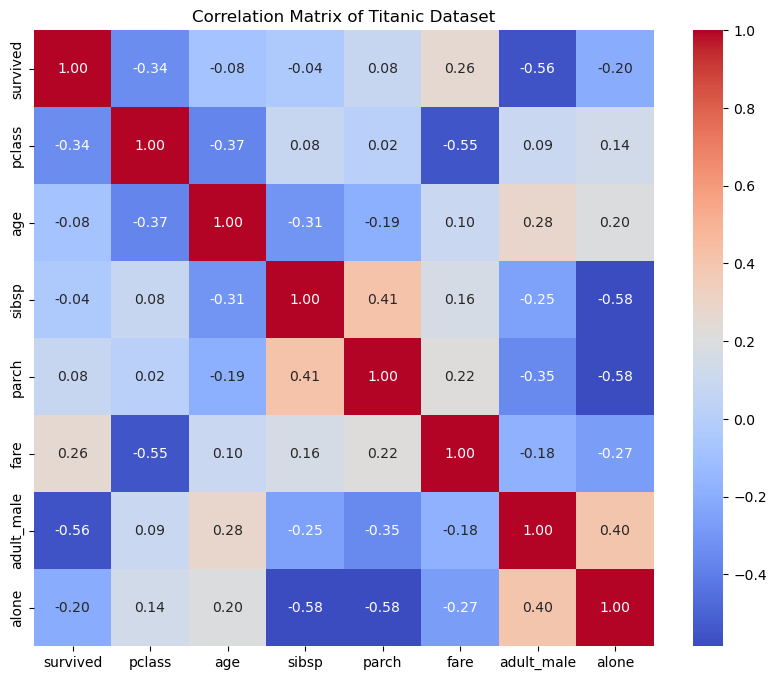

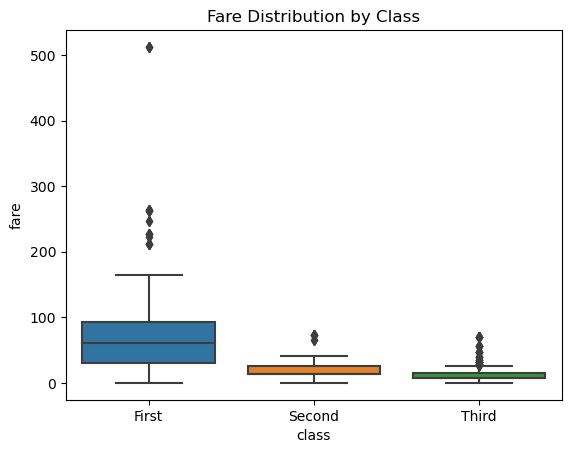

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

# Plot the distribution of 'fare' to check how the ticket prices are distributed
plt.figure(figsize=(10, 6))
sns.histplot(titanic['fare'], kde=True, bins=30, color='blue')
plt.title('Distribution of Ticket Fare on Titanic')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Optional
# Additional exploration to find patterns in the data
# Plot the correlation matrix to see relationships between numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

# Explore 'fare' against different categorical variables (e.g., 'class', 'embarked', etc.)
sns.boxplot(x='class', y='fare', data=titanic)
plt.title('Fare Distribution by Class')
plt.show()

# Assignment 9

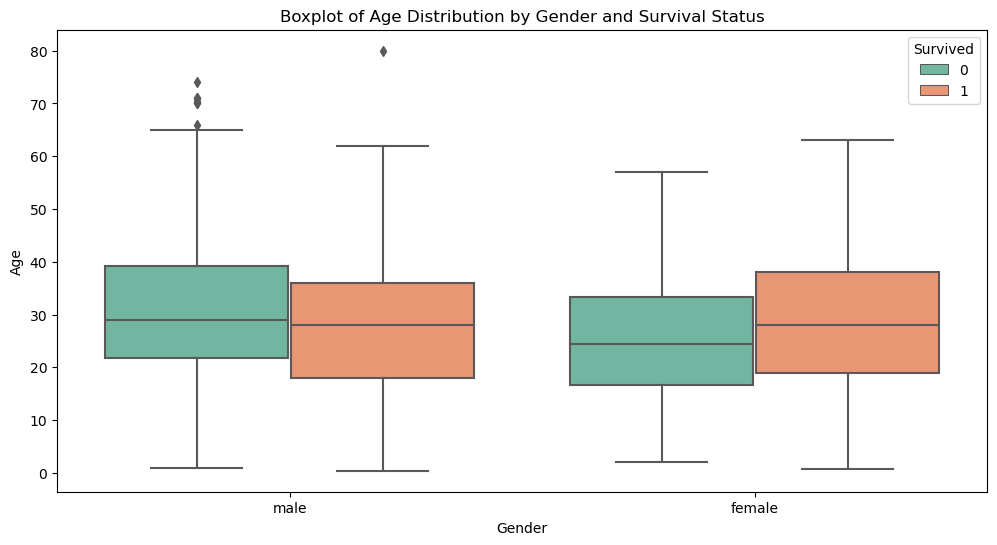

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

# 1. Plotting the boxplot for 'age' with respect to 'sex' and 'survived'
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='age', hue='survived', data=titanic, palette='Set2')
plt.title('Boxplot of Age Distribution by Gender and Survival Status')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')     
plt.show()

Observations:
Age Distribution:

The boxplot shows the distribution of ages for both male and female passengers.

You will likely notice the median age for males and females and how spread out the ages are (i.e., the interquartile range or the box size).

Impact of Survival:

The plot will also show how survival status (survived) affects the age distribution.

For example, we may observe that a larger proportion of female passengers survived, particularly young women, which could be due to the "women and children first" policy.

Outliers:

Any data points that fall outside the whiskers of the box (i.e., dots) represent outliers. For instance, there might be a few older passengers whose ages were significantly different from the majority.

Gender Comparison:

Comparing the distributions between male and female passengers, we can infer if age had a significant role in the survival rates for each gender.

# Assignment 10

Features and their types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


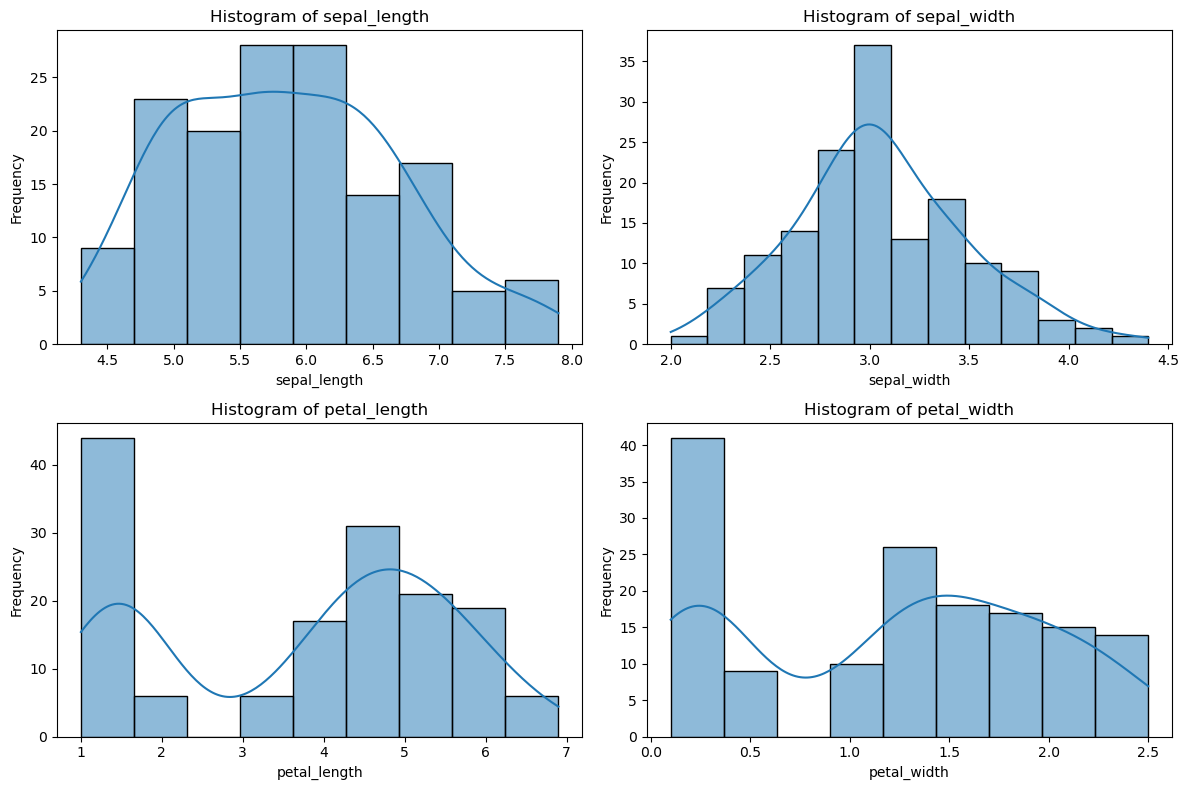

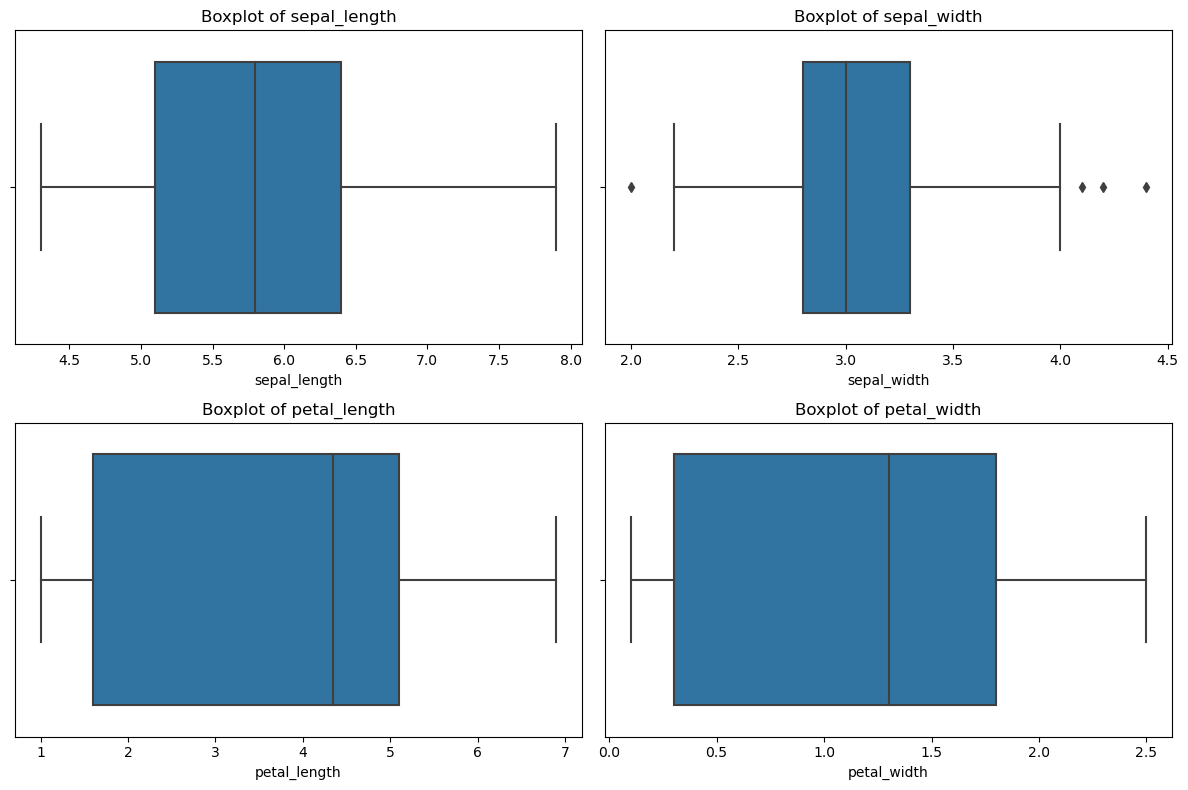


Observations:
1. Sepal Length and Sepal Width show normal distributions, but Petal Length and Petal Width have some skewness.
2. All the features show the presence of outliers in the boxplots, particularly in Petal Length.


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the Iris dataset from seaborn
iris = sns.load_dataset('iris')

# 1. List down the features and their types
print("Features and their types:")
print(iris.dtypes)

# 2. Create a histogram for each feature
iris_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Plot histograms for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(iris[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Create a boxplot for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(iris_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=iris[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

# 4. Compare distributions and identify outliers
print("\nObservations:")
print("1. Sepal Length and Sepal Width show normal distributions, but Petal Length and Petal Width have some skewness.")
print("2. All the features show the presence of outliers in the boxplots, particularly in Petal Length.")